<a href="https://colab.research.google.com/github/AsmaaKhamis1911/Deep-Learning-With-PyTorch/blob/main/SimpleNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F


In [2]:
# Create a Model Class that inherits nn.Module
class Model(nn.Module):
    # Input layer (4 features of the flower) -->
    # Hidden Layer1 (number of neurons) -->
    # H2 (n) -->
    # output (3 classes of iris flowers)
    def __init__(self, in_features=4, h1=3, h2=4, out_features=3):
        super().__init__()  # instantiate our nn.Module
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)

        return x

In [3]:
# Pick a manual seed for randomization
torch.manual_seed(41)

# Create an instance of model
model = Model()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
url='https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
myds=pd.read_csv(url)

In [6]:
myds

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [7]:
myds.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
myds.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [9]:
myds['species']=myds['species'].map({'setosa':0,'versicolor':1,'virginica':2})

In [10]:
myds

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [11]:
X=myds.drop('species',axis=1).values
Y=myds['species'].values

In [12]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [13]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=41)

In [16]:
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)


In [17]:
Y_train=torch.LongTensor(Y_train)
Y_test=torch.LongTensor(Y_test)

In [18]:
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [19]:
epochs = 100
losses = []
for i in range(epochs):
  y_pred = model.forward(X_train)
  loss = criterion(y_pred, Y_train)
  losses.append(loss.detach().numpy())
  if i%100:
    print(f'Epoch: {i} and loss: {loss}')

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()




Epoch: 1 and loss: 1.1508489847183228
Epoch: 2 and loss: 1.1392804384231567
Epoch: 3 and loss: 1.129326581954956
Epoch: 4 and loss: 1.1227920055389404
Epoch: 5 and loss: 1.1156723499298096
Epoch: 6 and loss: 1.1113247871398926
Epoch: 7 and loss: 1.1087017059326172
Epoch: 8 and loss: 1.1066137552261353
Epoch: 9 and loss: 1.1047502756118774
Epoch: 10 and loss: 1.1029109954833984
Epoch: 11 and loss: 1.1010314226150513
Epoch: 12 and loss: 1.09913969039917
Epoch: 13 and loss: 1.097296118736267
Epoch: 14 and loss: 1.0955475568771362
Epoch: 15 and loss: 1.0939078330993652
Epoch: 16 and loss: 1.0923558473587036
Epoch: 17 and loss: 1.0908446311950684
Epoch: 18 and loss: 1.089314579963684
Epoch: 19 and loss: 1.0877071619033813
Epoch: 20 and loss: 1.0859721899032593
Epoch: 21 and loss: 1.0840721130371094
Epoch: 22 and loss: 1.0819833278656006
Epoch: 23 and loss: 1.0796955823898315
Epoch: 24 and loss: 1.077211856842041
Epoch: 25 and loss: 1.0745435953140259
Epoch: 26 and loss: 1.071705937385559
Ep

Text(0.5, 0, 'Epochs')

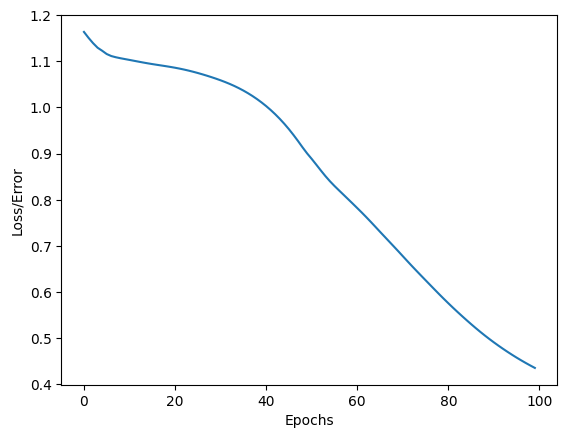

In [20]:
plt.plot(range(epochs),losses)
plt.ylabel('Loss/Error')
plt.xlabel('Epochs')

In [21]:
with torch.no_grad():
    y_eval = model.forward(X_test)
    loss = criterion(y_eval, Y_test)

In [22]:
loss

tensor(0.4597)

In [24]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    if Y_test[i] == 0:
      x = "Setosa"
    elif Y_test[i] == 1:
      x = 'Versicolor'
    else:
      x = 'Virginica'


    # Will tell us what type of flower class our network thinks it is
    print(f'{i+1}.)  {str(y_val)} \t {Y_test[i]} \t {y_val.argmax().item()}')

    # Correct or not
    if y_val.argmax().item() == Y_test[i]:
      correct +=1

print(f'We got {correct} correct!')

1.)  tensor([-2.6939,  1.6214,  2.0538]) 	 2 	 2
2.)  tensor([-3.6094,  2.1017,  2.9713]) 	 2 	 2
3.)  tensor([-4.1106,  2.3647,  3.4735]) 	 2 	 2
4.)  tensor([-2.0368,  1.2766,  1.3954]) 	 1 	 2
5.)  tensor([-3.4588,  2.0227,  2.8204]) 	 2 	 2
6.)  tensor([-1.5187,  1.0048,  0.8761]) 	 1 	 1
7.)  tensor([-2.7757,  1.6643,  2.1358]) 	 2 	 2
8.)  tensor([-2.0559,  1.2866,  1.4145]) 	 1 	 2
9.)  tensor([-3.1279,  1.8491,  2.4887]) 	 2 	 2
10.)  tensor([-3.9256,  2.2676,  3.2881]) 	 2 	 2
11.)  tensor([-2.6947,  1.6218,  2.0547]) 	 2 	 2
12.)  tensor([ 1.3125, -0.4479, -1.9116]) 	 0 	 0
13.)  tensor([ 1.3125, -0.4479, -1.9116]) 	 0 	 0
14.)  tensor([-0.8359,  0.6465,  0.1919]) 	 1 	 1
15.)  tensor([ 1.3125, -0.4479, -1.9116]) 	 0 	 0
16.)  tensor([-2.5867,  1.5651,  1.9464]) 	 2 	 2
17.)  tensor([ 1.3125, -0.4479, -1.9116]) 	 0 	 0
18.)  tensor([-2.7317,  1.6412,  2.0917]) 	 1 	 2
19.)  tensor([ 1.3125, -0.4479, -1.9116]) 	 0 	 0
20.)  tensor([ 1.3125, -0.4479, -1.9116]) 	 0 	 0
21.)  ten

In [25]:
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])

In [26]:
with torch.no_grad():
  print(model(new_iris))

tensor([ 1.3125, -0.4479, -1.9116])


In [27]:
newer_iris = torch.tensor([5.9, 3.0, 5.1, 1.8])

In [28]:
with torch.no_grad():
  print(model(newer_iris))

tensor([-2.8585,  1.7078,  2.2188])


In [29]:
# Save our NN Model
torch.save(model.state_dict(), 'NN_Model.pt')

In [30]:
# Load the Saved Model
new_model = Model()
new_model.load_state_dict(torch.load('NN_Model.pt'))

<All keys matched successfully>

In [31]:
# Make sure it loaded correctly
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=3, bias=True)
  (fc2): Linear(in_features=3, out_features=4, bias=True)
  (out): Linear(in_features=4, out_features=3, bias=True)
)